# From netwotk to Persistence Homology

* Set the maximum dimension. Has exponential impact on time complexity
* dim = 1 for connected components - Betti 0
* dim = 2 for cycles - Betti 1
* dim = 3 for voids - Betti 2, and so on.

In [1]:
import networkx as nx
import pandas as pd
import gudhi as gd  
import matplotlib.pyplot as plt

#Open a CCN 
PCD_CCN = nx.read_edgelist('1 output\Consensus PCD')

#create a Distance Matrix (dm), the space metric to calculate PH
dm=pd.DataFrame(dict(nx.shortest_path_length(PCD_CCN)))
#Make sure the dm is symetrical 
dm.sort_index(inplace=True)
dm=dm[sorted(dm.columns)]

#Create a object to work with the Vietoris-Rips Complex
rips_complex = gd.RipsComplex(distance_matrix = dm.values)

#Set max dimension and calculate PH
dim = 3
barCode = rips_complex.create_simplex_tree(max_dimension = dim).persistence()

print("Number of Betti 0 Structures:",len([b for b in barCode if b[0]==0]))
print("Number of Betti 1 Structures:",len([b for b in barCode if b[0]==1]))
print("Number of Betti 2 Structures:",len([b for b in barCode if b[0]==2]))

Number of Betti 0 Structures: 170
Number of Betti 1 Structures: 23
Number of Betti 2 Structures: 10


# Changing the Radius
To construct the Rips complex, a ball of radius 𝑟 is grown around each point. If two points' 𝑟-balls intersect, an edge (1-simplex) is created between them. Vitoris-Rips has exponential cust based on the max dimension parameter. Is it possible to limit the radius 𝑟 to reduce complexity at the expense of not finding all possible structures.

In [2]:
tutteGraph = nx.generators.tutte_graph()
dm=pd.DataFrame(dict(nx.shortest_path_length(tutteGraph)))
dm.sort_index(inplace=True)
dm=dm[sorted(dm.columns)]

# To construct the Rips complex, a ball of radius 𝑟 is grown around each point. 
# We can limit 𝑟 using the max_edge_length parameter.
rips_complex_r1 = gd.RipsComplex(distance_matrix = dm.values,max_edge_length=1)
rips_complex_r2 = gd.RipsComplex(distance_matrix = dm.values,max_edge_length=2)
# If omitted, the  𝑟 grows until it encompasses all points.
rips_complex_default = gd.RipsComplex(distance_matrix = dm.values)

dim = 5
BarCode_r1= rips_complex_r1.create_simplex_tree(max_dimension = dim).persistence()
BarCode_r2= rips_complex_r2.create_simplex_tree(max_dimension = dim).persistence()
BarCode_default= rips_complex_default.create_simplex_tree(max_dimension = dim).persistence()

In [3]:
%%time
rips_complex_r1.create_simplex_tree(max_dimension = dim).persistence();

CPU times: total: 0 ns
Wall time: 0 ns


In [4]:
%%time
rips_complex_r2.create_simplex_tree(max_dimension = dim).persistence();

CPU times: total: 0 ns
Wall time: 1 ms


In [5]:
%%time
BarCode_default= rips_complex_default.create_simplex_tree(max_dimension = dim).persistence()

CPU times: total: 14.3 s
Wall time: 15.5 s


c:\Users\ragna\anaconda3\Lib\site-packages\gudhi\persistence_graphical_tools.py:105: UserWarning: This function is not available.
ModuleNotFoundError: No module named 'matplotlib'.
  warnings.warn(f"This function is not available.\nModuleNotFoundError: No module named '{import_error.name}'.")


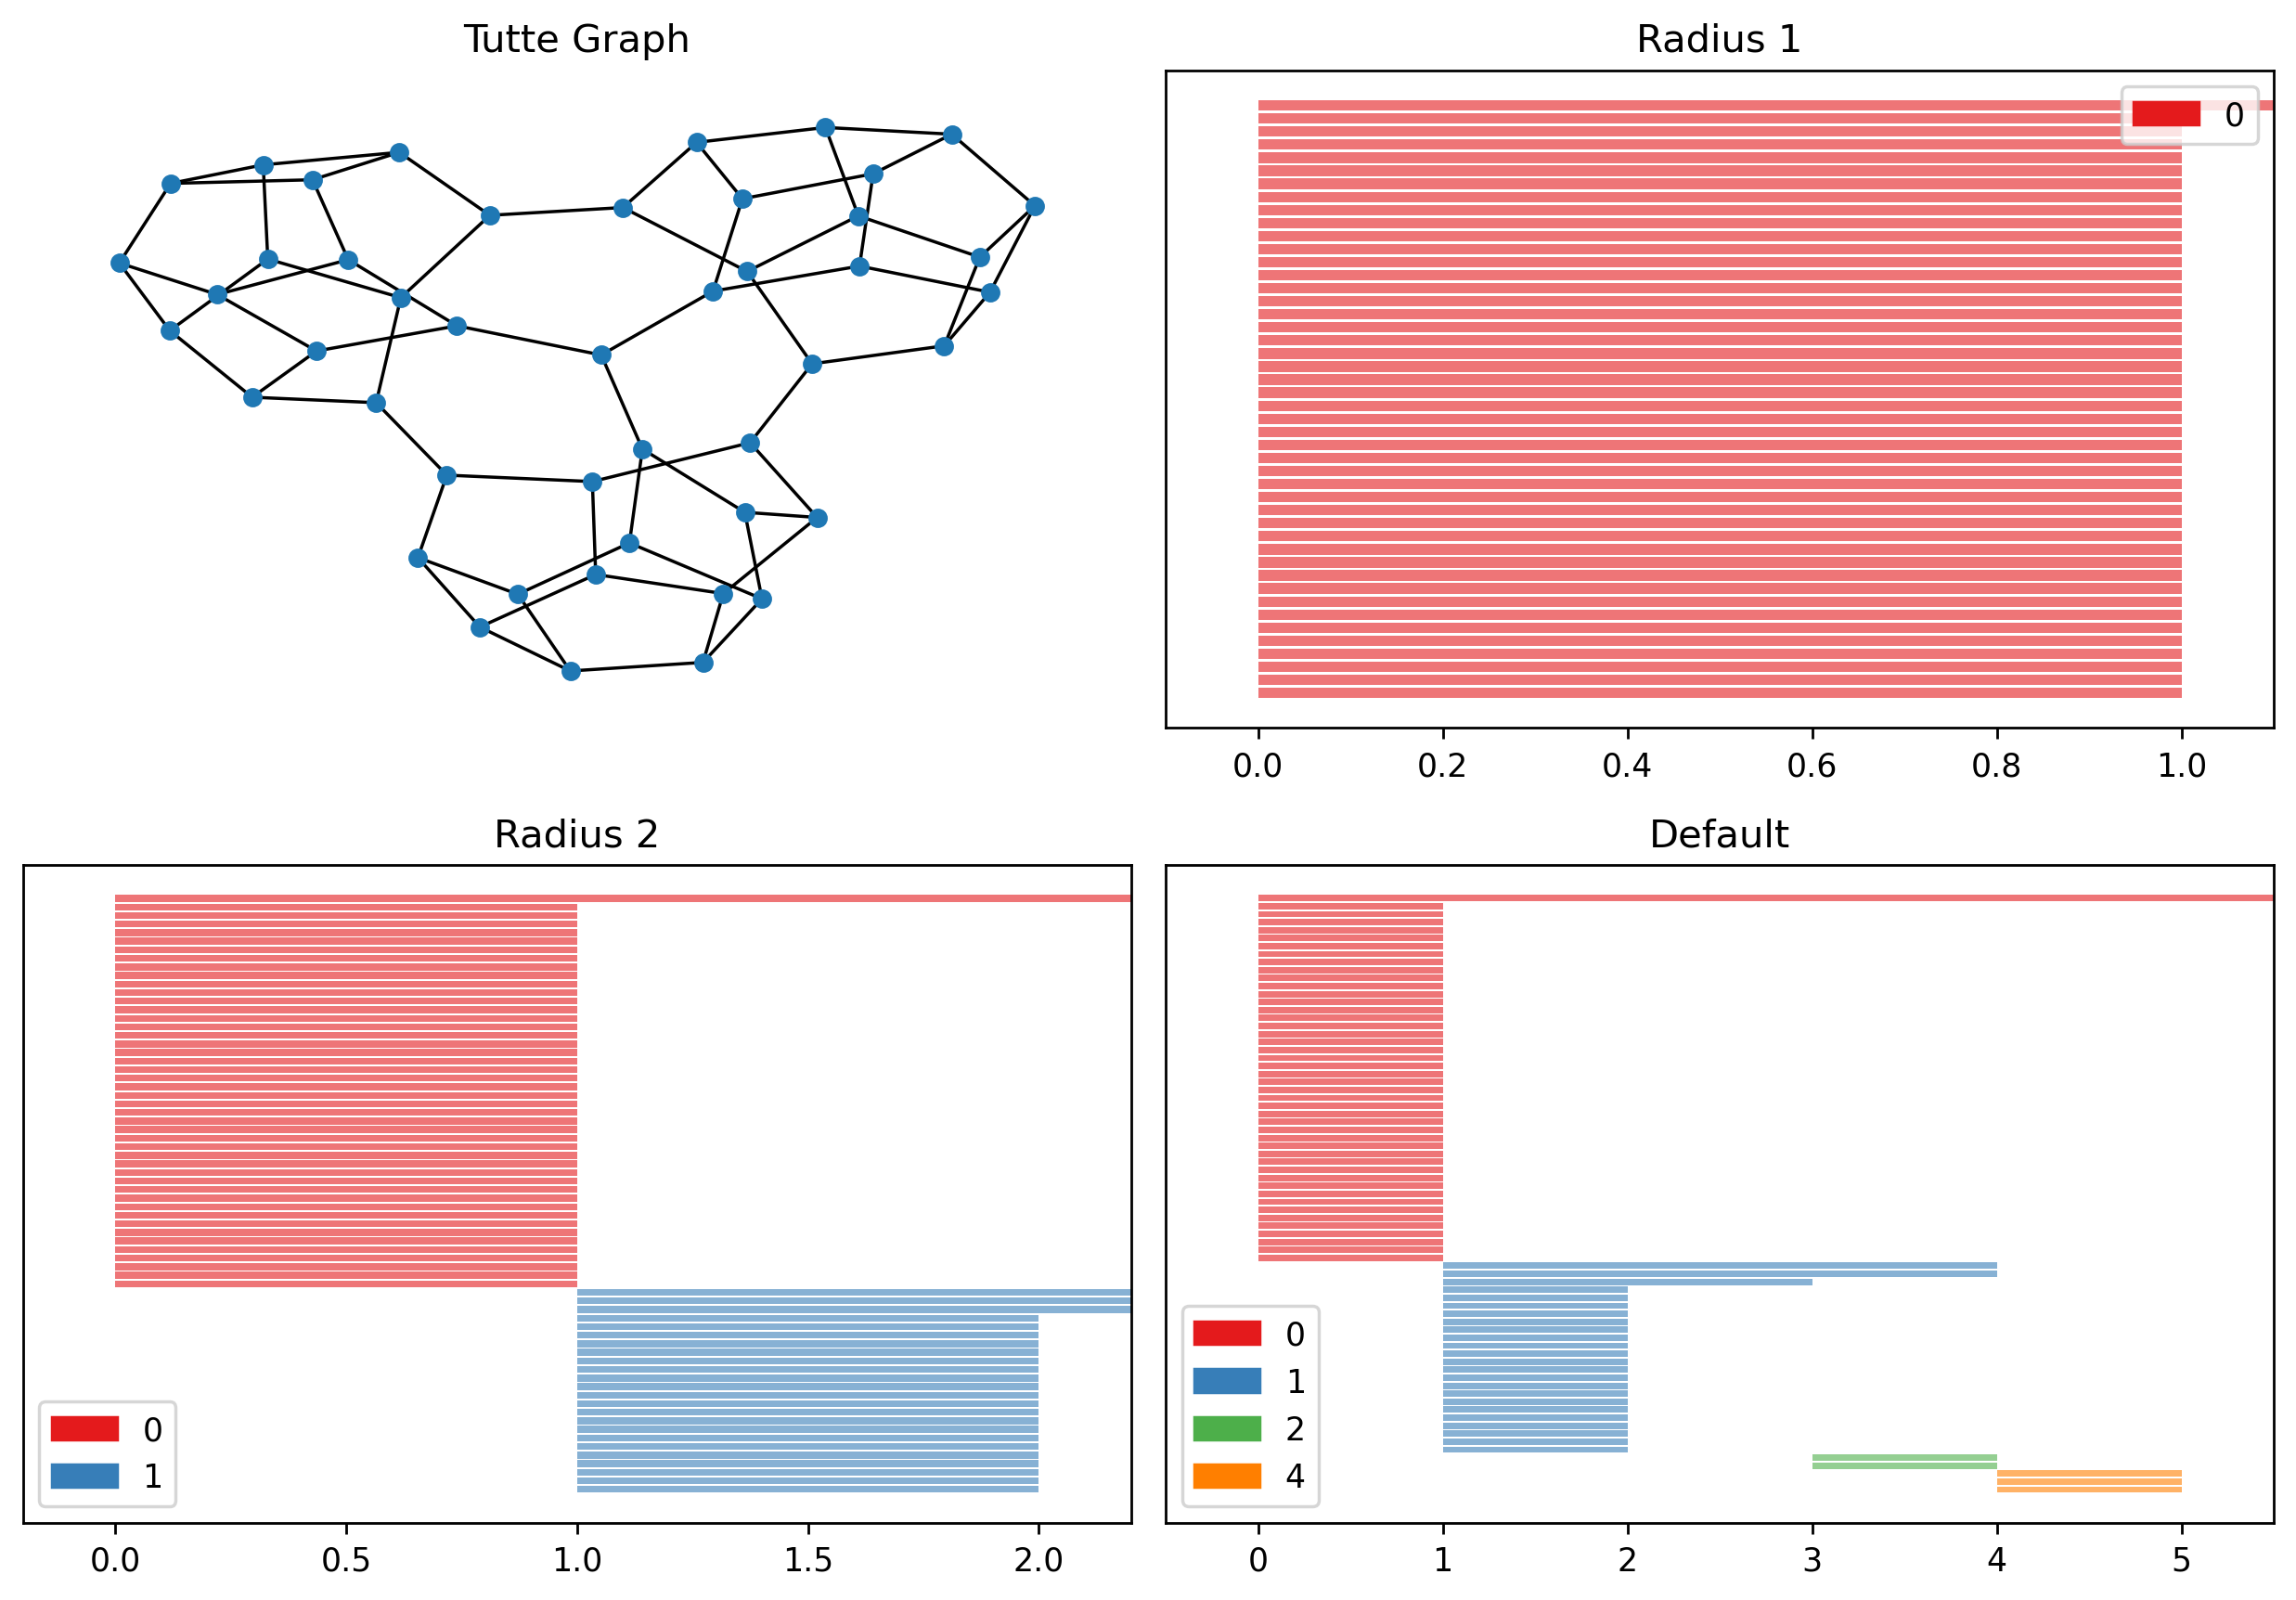

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(10, 7),dpi=250)

nx.draw_kamada_kawai(tutteGraph,node_size=25,ax=axes[0,0])
axes[0,0].set_title("Tutte Graph")

gd.plot_persistence_barcode(BarCode_r1,axes=axes[0,1]);    
axes[0,1].set_title(f"Radius {1}")

gd.plot_persistence_barcode(BarCode_r2,axes=axes[1,0]);    
axes[1,0].set_title(f"Radius {2}")

gd.plot_persistence_barcode(BarCode_default,axes=axes[1,1]);    
axes[1,1].set_title(f"Default")

plt.tight_layout()
plt.show()

In [7]:
print(tutteGraph)

Graph named "Tutte's Graph" with 46 nodes and 69 edges


# Barcodes for the CCNs

In [ ]:
PCD_CCN = nx.read_edgelist('1 output\Consensus PCD')
CHR_CCN = nx.read_edgelist('1 output\Consensus CHR')
DNA_CCN = nx.read_edgelist('1 output\Consensus DNA')

dim=3
barCodes=[]
for ccn in [CHR_CCN,DNA_CCN,PCD_CCN]:
    dm=pd.DataFrame(dict(nx.shortest_path_length(ccn)))
    dm.sort_index(inplace=True)
    dm=dm[sorted(dm.columns)]

    rips_complex_default = gd.RipsComplex(distance_matrix = dm.values)
    barCodes.append(rips_complex_default.create_simplex_tree(max_dimension = dim).persistence())

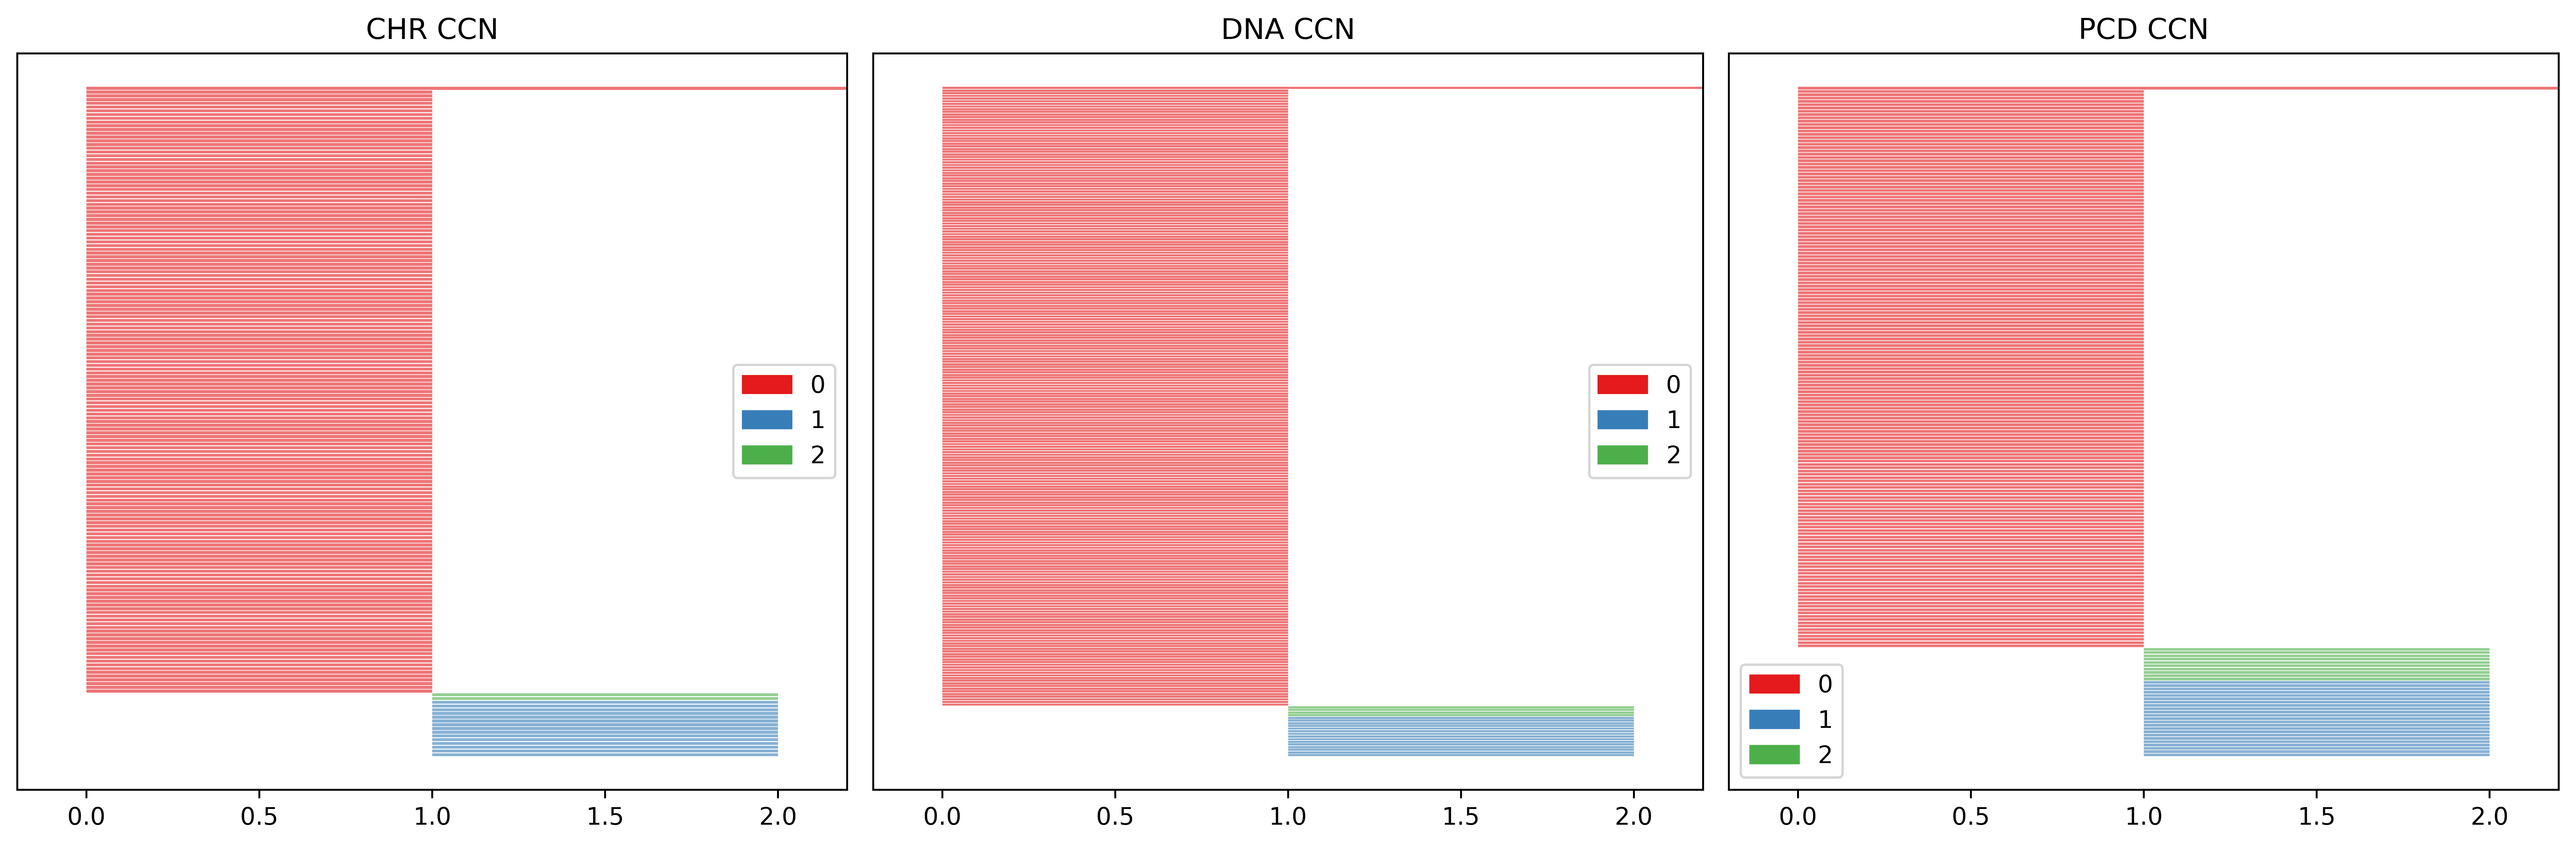

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5),dpi=550)

gd.plot_persistence_barcode(barCodes[0],axes=axes[0])
axes[0].set_title("CHR CCN")

gd.plot_persistence_barcode(barCodes[1],axes=axes[1]);    
axes[1].set_title("DNA CCN")

gd.plot_persistence_barcode(barCodes[2],axes=axes[2]);    
axes[2].set_title("PCD CCN")

plt.tight_layout()
plt.show()